# Notebook for Deep Graph Library #

Author: Teng Fu

The notebook introduces the DGL basics includes:

- Create a graph
- Read and write Node
- Edge representations

In [4]:
# import and print verson
import networkx as nx
import dgl
import matplotlib.pyplot as plt
%matplotlib inline

print(dgl.__version__)

0.1.3


## Create Graph ##

In [10]:
# generate a petersen graph
g_nx = nx.petersen_graph()
g_dgl = dgl.DGLGraph(g_nx)

>>>In the mathematical field of graph theory, the __Petersen graph__ is an undirected graph with 10 vertices and 15 edges.

>>>![ALT](https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Petersen1_tiny.svg/200px-Petersen1_tiny.svg.png "Petersen")

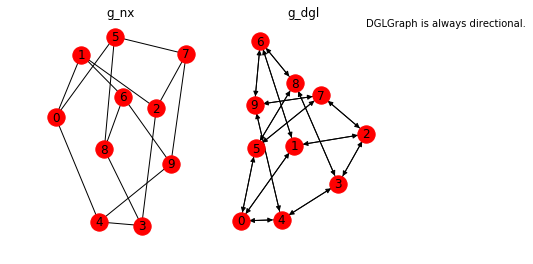

In [11]:
# draw two graph in subplot
plt.subplot(121)
plt.title("g_nx")
nx.draw(g_nx, with_labels=True)
plt.subplot(122)
plt.title("g_dgl")
nx.draw(g_dgl.to_networkx(), with_labels=True)
plt.text(1,1, "DGLGraph is always directional.")
plt.show()

## Read and Write Node with PyTorch ##

In [15]:
# create a star network with PyTorch tensor
import dgl
import torch as th

g = dgl.DGLGraph()
g.add_nodes(10)

# a couple edges one-by-one
for i in range(1, 4):
    g.add_edge(i, 0)
    
# a few more with a paired list
src = list(range(5, 8)); dst = [0]*3
print(src)
print(dst)

g.add_edges(src, dst)
# finish with a pair of tensors
src = th.tensor([8, 9]); dst = th.tensor([0, 0])
print(src)
print(dst)

g.add_edges(src, dst)

# edge broadcasting will do star graph in one go!
g.clear(); g.add_nodes(10)
src = th.tensor(list(range(1, 10)));
g.add_edges(src, 0)

[5, 6, 7]
[0, 0, 0]
tensor([8, 9])
tensor([0, 0])


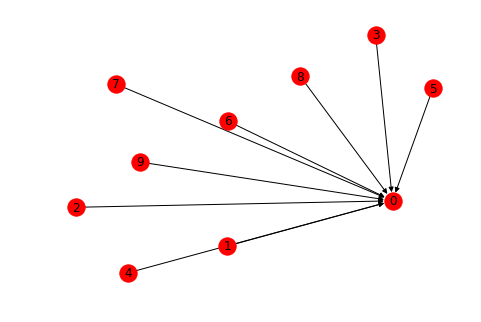

In [16]:
#draw the start graph
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

## Feature Assignment in Graph elements ##

In [19]:
x = th.randn(10, 3)
print(x)

# same graph g from above cell
g.ndata['x'] = x

tensor([[ 1.2709,  1.2280,  1.1331],
        [-0.2483, -0.3124,  0.0373],
        [-0.1010, -0.0191,  0.5621],
        [-0.3312,  0.7705, -0.5427],
        [ 0.0993, -1.1225, -0.2533],
        [-0.9602,  0.4760,  0.8820],
        [ 0.3754, -1.6842,  0.7383],
        [-1.1330, -0.8497, -0.4918],
        [ 0.0442, -0.8702,  1.0983],
        [-0.9369, -0.7849,  1.7640]])


In [20]:
# node assignment
print(g.ndata['x'] == g.nodes[:].data['x'])

# access node set with integer, list, or integer tensor
g.nodes[0].data['x'] = th.zeros(1, 3)
g.nodes[[0, 1, 2]].data['x'] = th.zeros(3, 3)
g.nodes[th.tensor([0, 1, 2])].data['x'] = th.zeros(3, 3)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.uint8)


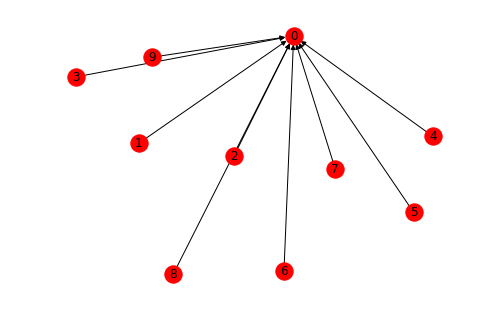

In [21]:
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

In [22]:
# edge assignment
g.edata['w'] = th.randn(9, 2)

# access edge set with IDs in integer, list, or integer tensor
g.edges[1].data['w'] = th.randn(1, 2)
g.edges[[0, 1, 2]].data['w'] = th.zeros(3, 2)
g.edges[th.tensor([0, 1, 2])].data['w'] = th.zeros(3, 2)

# one can also access the edges by giving endpoints
g.edges[1, 0].data['w'] = th.ones(1, 2)                 # edge 1 -> 0
g.edges[[1, 2, 3], [0, 0, 0]].data['w'] = th.ones(3, 2) # edges [1, 2, 3] -> 0

In [23]:
print(g.node_attr_schemes())
g.ndata['x'] = th.zeros((10, 4))
print(g.node_attr_schemes())

{'x': Scheme(shape=(3,), dtype=torch.float32)}
{'x': Scheme(shape=(4,), dtype=torch.float32)}


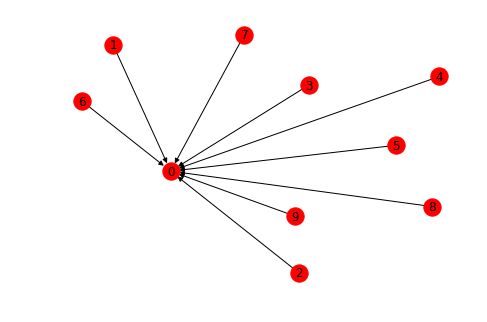

In [24]:
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

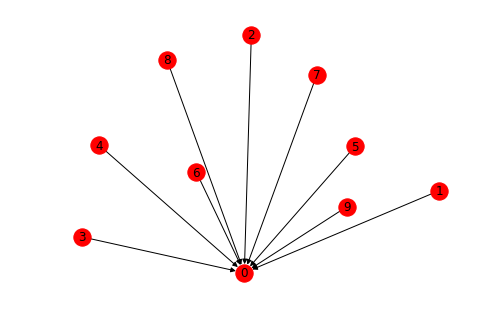

In [25]:
# node/edge removal
g.ndata.pop('x')
g.edata.pop('w')

nx.draw(g.to_networkx(), with_labels=True)
plt.show()